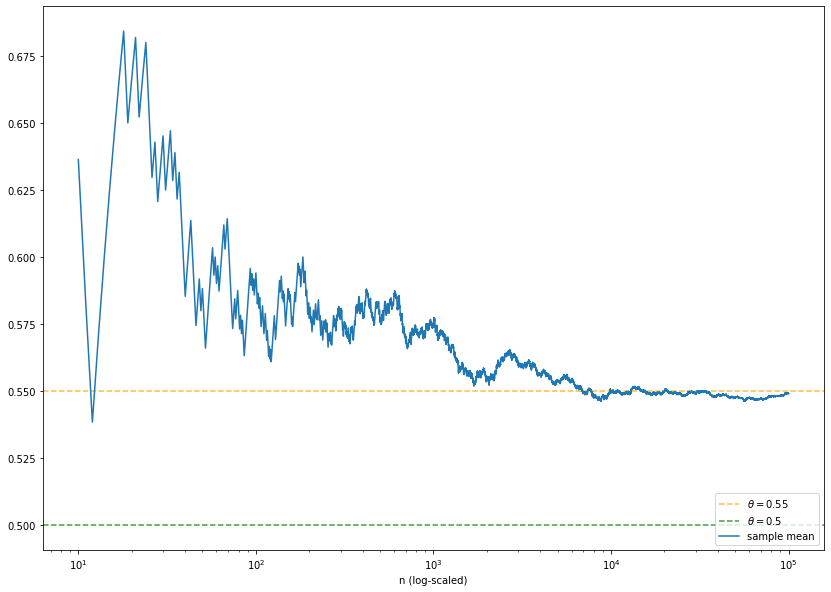

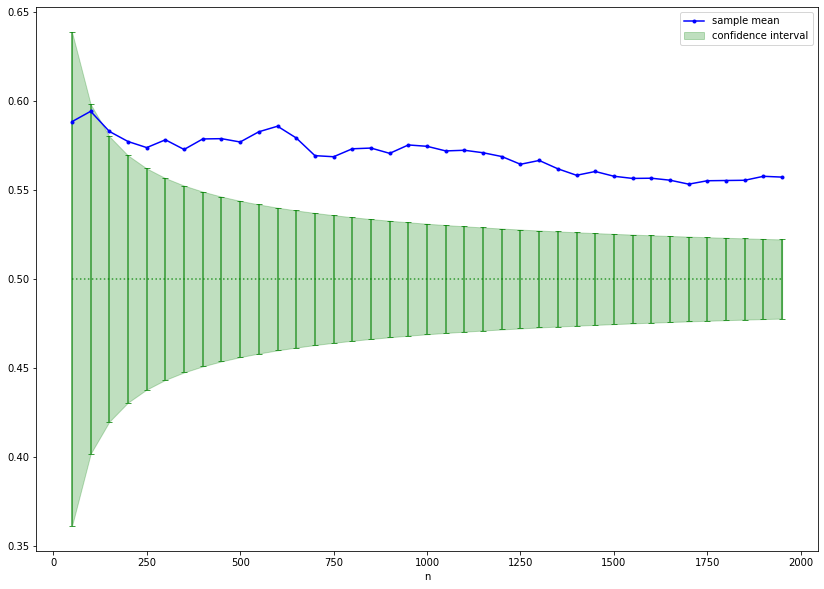

In [1]:
import numpy as np
from scipy.stats import bernoulli, norm
import matplotlib.pyplot as plt

N = 100000 # total number of coin tosses
theta = 0.55 # probability to toss heads ("unknown")
theta0 = 0.5 # probability assumed in the null hypothesis
alpha_sig = 0.05 # significance level

# generate N independent B(1, theta)-distributed observations
samples = bernoulli.rvs(theta, size=N)

# caluclate the sample means after n=1,...,N trials
sample_sums = np.zeros((N,)) # for later use
sample_means = np.zeros((N,))
for n in range(N):
    sample_sums[n] = np.sum(samples[:n+1])
    sample_means[n] = sample_sums[n]/(n + 1)

# plot the result
fig = plt.figure(figsize=(14, 10))
plt.axhline(y=theta, color='orange', linestyle='--', alpha=.75, label=r'$\theta=${}'.format(theta))
plt.axhline(y=theta0, color='g', linestyle='--', alpha=.75, label=r'$\theta=${}'.format(theta0))
plt.xscale('log')
plt.xlabel('n (log-scaled)')
plt.plot(np.arange(10, N), sample_means[10:], label='sample mean')
leg = plt.legend(loc='lower right')

# perform the hypothesis test for selected values of n
n_values = np.arange(50, 2000, step=50)
n_tests = len(n_values)
upper_bounds = np.zeros(n_tests)
lower_bounds = np.zeros(n_tests)
for i, n in enumerate(n_values):
    sigma2 = theta0*(1-theta0)/n # variance of sample mean under H0
    upper_bounds[i] = norm.ppf(1-alpha_sig/2, loc=theta0, scale=np.sqrt(sigma2)) # upper bound of confidence interval
    lower_bounds[i] = 2*theta0 - upper_bounds[i] # lower bound of confidence interval

# plot the result
fig = plt.figure(figsize=(14, 10))
plt.errorbar(n_values, theta0*np.ones(n_tests), yerr=(upper_bounds - theta0),
             c='g', alpha=.75, fmt=':', capsize=3, capthick=1)
plt.fill_between(n_values, lower_bounds, upper_bounds, color='g', alpha=.25, label='confidence interval')
plt.xlabel('n')
plt.plot(n_values, sample_means[n_values], marker='.', c='b', label='sample mean')
leg = plt.legend()

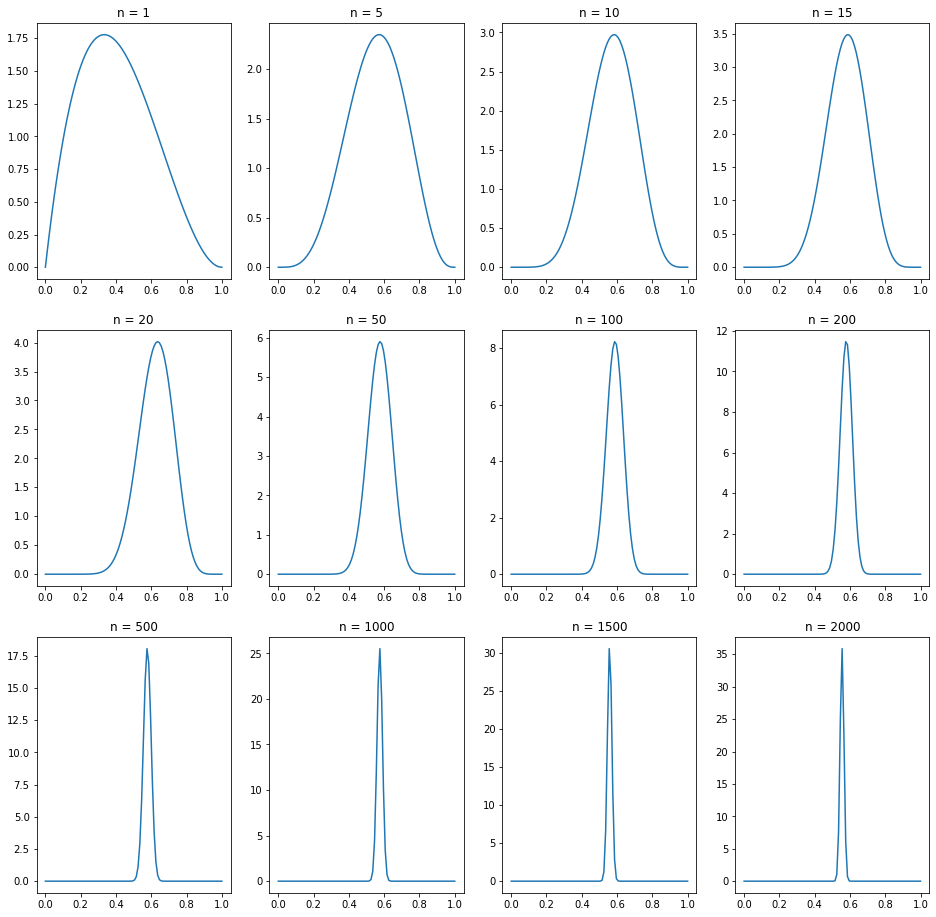

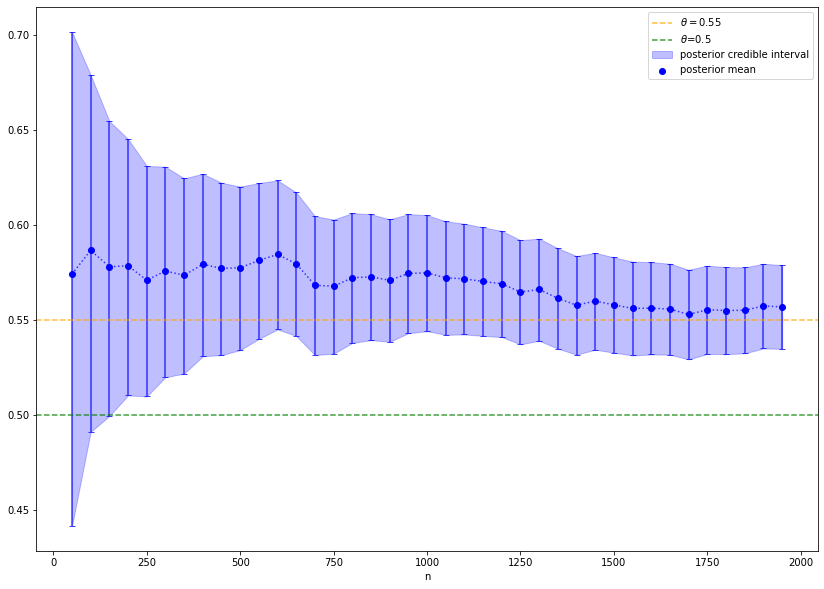

In [2]:
import numpy as np
from scipy.stats import beta as beta_distr
import matplotlib.pyplot as plt

alpha = 2 # alpha of prior distribution
beta  = 2 # beta of prior distribution

# use data (sample_sums) from first simulation
alphas = alpha + sample_sums # alpha values of posteriors
betas  = beta + np.arange(1, N+1) - sample_sums # beta values of posteriors 

# plot results for selected values of n
n_values = [1, 5, 10, 15, 20, 50, 100, 200, 500, 1000, 1500, 2000]

x = np.linspace(0, 1, num=100)
fig = plt.figure(figsize=(16, 16))
for i, n in enumerate(n_values):
    ax = fig.add_subplot(3, 4, i+1)
    ax.plot(x, beta_distr.pdf(x, alphas[n-1], betas[n-1]))
    ax.title.set_text('n = {}'.format(n))

# compute confidence bounds of posterior distributions
n_values = np.arange(50, 2000, step=50)
n_tests = len(n_values)
posterior_means = np.array([alphas[n-1]/(alphas[n-1] + betas[n-1]) for n in n_values])
posterior_modes = np.array([(alphas[n-1] -1)/(alphas[n-1] + betas[n-1] - 2) for n in n_values])
lower_errors = []
upper_errors = []
for i, n in enumerate(n_values):
    lower_errors.append(posterior_means[i] - beta_distr.ppf(alpha_sig/2, a=alphas[n-1], b=betas[n-1]))
    upper_errors.append(beta_distr.ppf(1-alpha_sig/2, a=alphas[n-1], b=betas[n-1]) - posterior_means[i])

# plot results
fig = plt.figure(figsize=(14, 10))
plt.errorbar(n_values, posterior_means, np.array(list(zip(lower_errors, upper_errors))).T, 
             c='b', alpha=.75, fmt=':', capsize=3, capthick=1)
plt.fill_between(n_values, posterior_means - np.array(lower_errors), posterior_means + np.array(upper_errors), 
                 color='b', alpha=.25, label='posterior credible interval')
plt.scatter(n_values, posterior_means, c='b', label='posterior mean')
# plt.scatter(n_values, posterior_modes, label='posterior mode')
plt.axhline(y=theta, color='orange', linestyle='--', alpha=.75, label=r'$\theta=${}'.format(theta))
plt.axhline(y=theta0, color='g', linestyle='--', alpha=.75, label=r'$\theta$={}'.format(theta0))
plt.xlabel('n')
leg = plt.legend()
    